# Asignación 2

1 .Creamos un un conjunto aleatorio de 30 puntos en un plano de dos dimensiones. Usamos la convención `30 x2`:

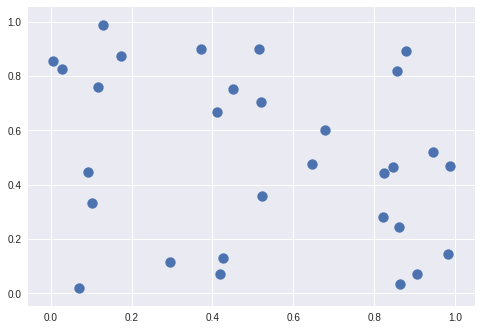

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X = np.random.rand(30, 2)
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

Escribe un programa  o sentencias en Python-Numpy  que, calcula la distancia, entre cada par de puntos. Utiliza broadcasting y aggregation.

In [10]:
# Naive way
for i, (x1, y1) in enumerate(X):
    for j, (x2, y2) in enumerate(X):
        if i < j:
            punto1 = np.array([x1, y1])
            punto2 = np.array([x2, y2])
            print("Distancia %d a %d: %f" %(i, j, np.sqrt((punto1[0]-punto2[0])**2 + (punto1[1] - punto2[1])**2)))
            
# Usando broadcasting y agregacion
dat = np.empty([30, 30]) # Cada celda (i, j) es la distancia desde el punto i al j
for i, (x, y) in enumerate(X):
    diff = X[:] - [x,y]
    dat[i, :] = np.sqrt(diff[:, 0]**2 + diff[:, 1] ** 2)

dat

Distancia 0 a 1: 0.775686
Distancia 0 a 2: 0.180940
Distancia 0 a 3: 0.885401
Distancia 0 a 4: 0.919112
Distancia 0 a 5: 0.379777
Distancia 0 a 6: 0.472633
Distancia 0 a 7: 0.199992
Distancia 0 a 8: 0.548656
Distancia 0 a 9: 0.454491
Distancia 0 a 10: 0.314135
Distancia 0 a 11: 0.782778
Distancia 0 a 12: 0.487587
Distancia 0 a 13: 0.164230
Distancia 0 a 14: 0.217557
Distancia 0 a 15: 0.734132
Distancia 0 a 16: 0.407679
Distancia 0 a 17: 0.732597
Distancia 0 a 18: 0.380131
Distancia 0 a 19: 0.505430
Distancia 0 a 20: 0.333979
Distancia 0 a 21: 0.030821
Distancia 0 a 22: 0.554158
Distancia 0 a 23: 0.622809
Distancia 0 a 24: 0.865251
Distancia 0 a 25: 0.884719
Distancia 0 a 26: 0.644448
Distancia 0 a 27: 0.404005
Distancia 0 a 28: 0.143818
Distancia 0 a 29: 0.162059
Distancia 1 a 2: 0.601368
Distancia 1 a 3: 0.228960
Distancia 1 a 4: 0.148773
Distancia 1 a 5: 0.739712
Distancia 1 a 6: 0.306803
Distancia 1 a 7: 0.903881
Distancia 1 a 8: 0.751303
Distancia 1 a 9: 0.772937
Distancia 1 a 10: 

array([[ 0.        ,  0.77568592,  0.18094047,  0.88540146,  0.91911225,
         0.37977725,  0.4726332 ,  0.19999246,  0.54865587,  0.45449142,
         0.3141346 ,  0.78277786,  0.48758655,  0.1642301 ,  0.21755739,
         0.73413231,  0.40767851,  0.73259745,  0.38013053,  0.50542981,
         0.33397904,  0.03082066,  0.55415803,  0.62280852,  0.86525075,
         0.8847187 ,  0.64444767,  0.40400538,  0.14381786,  0.16205875],
       [ 0.77568592,  0.        ,  0.60136811,  0.22896042,  0.14877287,
         0.73971178,  0.30680267,  0.90388079,  0.7513029 ,  0.77293713,
         0.56943355,  0.12741237,  0.33240517,  0.91590932,  0.58195106,
         0.31562753,  1.03933036,  0.42919759,  1.04772056,  0.70025551,
         1.05949336,  0.78593033,  0.4211876 ,  0.66767052,  0.74074247,
         0.11130243,  0.29036787,  0.40573289,  0.86251353,  0.85223215],
       [ 0.18094047,  0.60136811,  0.        ,  0.72983178,  0.74720116,
         0.40303462,  0.30596358,  0.31367479,  0

Escribe una sentencia, para calcular la diferencia y el cuadrado de sus coordenadas. Suma las diferencias de las coordenadas al cuadrado, para conseguir la distancia cuadrada.

In [ ]:
# Tu codigo
dat2 = np.empty([30, 30]) # Cada celda (i, j) es la distancia desde el punto i al j
for i, (x, y) in enumerate(X):
    dat2[i, :] = np.sqrt(((X[:]-[x,y])[:, 0])**2 + ((X[:]-[x,y])[:, 1]) ** 2)
dat2

Comprueba lo que se estás  haciendo, analizando la  diagonal de esta matriz.

In [ ]:
# Codigo
# La diagonal de la matriz es igual a cero ya que la distancia desde un
# punto a otro punto es nula.
# La matriz es simetrica ya que cada celda (x, y) es igual a la celda(y, x), es decir, la distancia del punto x
# al punto y es igual a la distancia del punto y al punto x.
np.trace(dat2)

Con la distancia establecida, usa `np.argsort`  para ordenar a lo largo de cada fila. Las columnas más a la izquierda darán entonces los índices de los vecinos más próximos.

In [ ]:
# codigo
#dat2
orden = np.argsort(dat2, axis=1)
orden

# Vemos que los elementos de la columna 1 estan ordenados ascendentementes.

Si todo esta ocurriendo como se espera, debes observar que la primera columna da los números   ordenados: esto se debe al hecho de que el vecino más cercano de cada punto es el mismo, como cabría esperar.

Si  estamos interesados en los `k` vecinos más cercanos, todo lo que necesitamos es dividir cada fila de manera que las  `k + 1` distancias  cuadradas más pequeñas vienen primero, con distancias mayores llenando las posiciones restantes de la matriz. Realiza esta operación utilizando la función `np.argpartition`:

In [ ]:
# Tu codigo
k = 2 
may = np.argpartition(dat2, k, axis=1)[:, :k+1]
print(may)
dat2[np.arange(dat2.shape[0])[:, None], may]


Con el fin de visualizar esta red de vecinos, grafica los puntos junto con las líneas que representan las conexiones de cada punto a sus dos vecinos más cercanos. Un ejemplo es:

![](k-vecinos.png)

In [ ]:
# Grafico
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1], s=100)

for i in np.arange(may.shape[0]):
    p_base = X[i]
    for j in np.arange(may.shape[1]):
        punto2 = may[i, j];
        p_dest = X[punto2]       
        plt.plot([p_base[0], p_dest[0]],[p_base[1],p_dest[1]], 'k-')
            
plt.show()

Presenta un reporte de este procedimiento de Numpy y el implementado en [Scikit-learn sobre KD-Tree](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html).

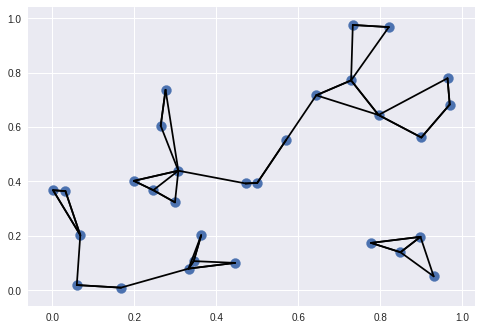

In [29]:
from sklearn.neighbors import KDTree
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

np.random.seed(0) # Se elige una semilla inicial
tree = KDTree(X, leaf_size=2) # Le pasamos el dataset y al leaf_size
                              # el cual puede que nos mejore el tiempo
                              # de cada query y la memoria para cada
                              # arbol contruido.
dist, ind = tree.query(X, k=3) # En esta query le pasamos toda la data
                               # de entrenamiento que la vamos a usar
                               # como data de testeo y el valor de k
                               # que indica la cantidad de vecinos

# Graficar los puntos y las rectas
plt.scatter(X[:, 0], X[:, 1], s=100)

for i in np.arange(ind.shape[0]):
    p_base = X[i]
    for j in np.arange(ind.shape[1]):
        punto2 = ind[i, j];
        p_dest = X[punto2]       
        plt.plot([p_base[0], p_dest[0]],[p_base[1],p_dest[1]], 'k-')
            
plt.show()


### Reporte de la implementacion en NumPy
#### k = 5
Seleccionamos la cantidad de vecinos mas cercanos
#### may = np.argpartition(dat2, k, axis=1)[:, :k+1]
Primero, se posiciona en la posicion k el valor de la fila ordenada.

Segundo, se colocan del 0 .. k-1 los valores menores al valor de la posicion k.

Tercero, se colocan del k+1 .. n-1 los valores mayores al valor de la posicion k.

axis=1 indica que se va a trabajar sobre las filas.

Luego, nos devuelven los indices del array con las restricciones mencionadas arriba.

Al final, se seleccionar los indices para todas las filas y, las k vecinos mas cercanos y si mismo.

#### dat2[np.arange(dat2.shape[0])[:, None], may]
Primero, se crea un arreglo unidimensional de 30 elementos (0 ... 29).

Segundo, se redimensiona a un arreglo bidimensional de 30x1.

Luego, se toma como filas de 0 a 29 y se toma como columnas a las posiciones del arreglo may.

Esta pregunta es un adelanto a lo que viene, sobre  extraer datos  de un archivo `HTML`, `XML`, `CSV` o `JSON`, o incluso de texto sin formato. Asumiendo que conocemos  las etiquetas de `HTML` y `XML` y su estructura  y  como  separar las etiquetas de los datos y normalizar las palabras (Sino lo sabes ¡Vamos a practicar!) 

2 .Escriba un programa que, dado el  `URL` de una página web, reporte los nombres y destinos de `enlaces caidos` en la página. Para el propósito de este ejercicio, se dice que un enlace está caido, si falla el intento de abrirlo con `urllib.request.urlopen()`.

In [ ]:
# Tu codigo
import urllib.request, urllib.error
import re

try:
    with urllib.request.urlopen("http://python.org/") as doc:
        # Guardamos el contenido de la pag en html
        html = doc.read()
        html_str = html.decode()

except: 
    # Al momento de no poder abrir el link
    print("No se puede abrir el archivo %s" % doc, file=sys.err)


links = re.findall(r'href=[\'"]?([^\'" >]+)', html_str)
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' '.join(links))

for link in urls:
    try:
        conn = urllib.request.urlopen(link)
        data = conn.read()
        conn.close()
    except urllib.error.HTTPError as e:
        # Retorna 404 error, es lo mas comun.
        print(link + " " + str(e.code) + " error")
    except urllib.error.URLError as e:
        # Conexion rechazada
        print(link + " " + 'URLError')
    else:
        # Exito
        print(link + " " + 'Bien')

http://www.ie6countdown.com/ Bien
http://browsehappy.com/ Bien
http://www.google.com/chromeframe/?redirect=true 404 error
https://docs.python.org Bien
https://pypi.python.org/ Bien
http://plus.google.com/+Python Bien
http://www.facebook.com/pythonlang?fref=ts Bien
http://twitter.com/ThePSF Bien
http://brochure.getpython.info/ Bien
https://docs.python.org/3/license.html Bien
https://wiki.python.org/moin/BeginnersGuide Bien


3 . [MediaWiki](https://www.mediawiki.org/wiki/API:Main_page) proporciona una API basada en JSON que permite el acceso programable a  datos de  Wikipedia. Escribe un programa que reporte los diez [stems][https://en.wikipedia.org/wiki/Science,_technology,_engineering,_and_mathematics] más frecuentemente usados en la página de Wikipedia titulada "Data science".

* Usa HTTP y no HTTPS
* Lee el archivo *Un ejemplo simple* o en inglés *simple example* de la página de [MediaWiki](https://www.mediawiki.org/wiki/API:Main_page) y útilizalo en la base de tu programa.
* Primero, obtenga el ID de la página por título, luego obtenga la página por su ID.
* Explora visualmente los datos JSON, especialmente las claves en los diferentes niveles de jerarquía.

In [ ]:
# Tu codigo

3 . Escribe un programa que usa Wikipedia para calcular la similitud semántica entre diferentes géneros de música `rock/ pop`. Comienza con la lista de [grupos musicales principales por género](https://en.wikipedia.org/wiki/Category:Rock_music_groups_by_genre)(ten en cuenta que esta lista es jerárquica y contiene subcategorías.). Procesa recursivamente la lista y  hasta encontrar todos los grupos relevantes (puede restringir tu exploración para seleccionar subcategorías, como los grupos de rock británicos, para ahorrar tiempo y tráfico). Para cada grupo encontrado, extraiga los géneros, si es posible. Usa el índice de similitud [Jaccard](https://en.wikipedia.org/wiki/Jaccard_index) como una medida de similitud semántica. Por cierto, ¿cuántos géneros están ahí fuera y cuáles son los géneros más relacionados?.

In [ ]:
# Tu codigo

4 .Escriba un programa Python que, para cada palabra en un archivo dado, registre la palabra en sí, su número ordinal en el archivo (a partir de 1) y el [etiquetado (part-of-speech tagging)](http://www.nltk.org/book/ch05.html) en una base de datos MySQL. Utilice `NLTK WordPunctTokenizer`  para reconocer palabras. Suponga que las palabras son lo suficientemente cortas como para caber en el tipo de datos `TINYTEXT MySQL`. Diseñe el esquema de base de datos, cree todas las tablas necesarias y juegue con ellas a través de la interfaz de línea de comandos antes de iniciar cualquier codificación de Python.

In [ ]:
# Tu codigo

5 . La sentencia de `MySQL` `DESCRIBE table_name`, realiza un reporte de los nombres, tipos de datos, restricciones, valores predeterminados, etc,  de todas las columnas en una tabla. Escribe un programa Python que transfiera todos los datos de una tabla MySQL (designada por el usuario) a un documento `MongoDB`. El programa no debe modificar los timestamps.

In [ ]:
# Tu codigo..